In [188]:
folder = '..\\BoidTest\\ES - Results\\'
#folder = ''
prefix = "Run "
runs = [i+1 for i in range(5)]
datatypes = ['predator', 'prey']
#runs = [1]
#datatypes = ['predator']
postfix = 'ESBoidRuns.txt'

In [189]:
print(runs)

[1, 2, 3, 4, 5]


In [190]:
import os
#print(os.getcwd())

In [217]:
def getData(fileStr):
    dbs = {}
    lines = fileStr.split('\n')
    lst = []
    lstName = ''
    named = False
    for line in lines:
        lineStr = line.split('\t')
        #print(lineStr)
        if len(lineStr[0]) > 0 : 
            if not lineStr[0].isnumeric():
                if not named:
                    named = True
                else:
                    if type(lst[0]) == type({}):
                        fitLst = []
                        genLst = []
                        sigmaLst = []
                        for genome in lst:
                            fitLst.append(genome['fitness'])
                            genLst.append(genome['genome'])
                            sigmaLst.append(genome['sigma'])
                        dbs[lstName] = {'fitness': fitLst,\
                                       'genome': genLst,\
                                       'sigma': sigmaLst}
                        lst = []
                    else:
                        dbs[lstName] = lst
                        lst = []

                lstName = lineStr[2]
            else:
                if not lineStr[2].replace('.', '').isnumeric():
                    genome = genomeDB(lineStr[2])
                    lst.append(genome)
                else:
                    lst.append(float(lineStr[2]))
    dbs[lstName] = lst
    return dbs

In [218]:
#{'fitness': 297.0, 'genome': [4.37, 1.62, 1.49, 3.27], 'sigma': 1.4043}

In [219]:
dbs = {}
for datatype in datatypes:
    dbs[datatype] = {}
    for runNum in runs:
        file = folder + prefix + str(runNum) + ' ' + datatype + postfix
        s = ''
        with open(file, 'r') as f:
            for line in f:
                s += line
        fileDbs = getData(s)
        dbs[datatype][runNum] = fileDbs
#print(dbs)

In [221]:
print(dbs['predator'][5]['BEST INDIVIDUAL']['fitness'])

[372.0, 372.0, 320.0, 433.0, 433.0, 341.0, 337.0, 296.0, 296.0, 288.0, 268.0, 331.0, 389.0, 391.0, 430.0, 430.0, 424.0, 437.0, 437.0, 287.0, 280.0, 297.0, 297.0, 434.0, 434.0, 352.0, 352.0, 308.0, 342.0, 433.0, 433.0, 450.0, 450.0, 340.0, 294.0]


In [222]:
import pandas as pd
import json
dbs_name = 'ES_data_genomes.json'
with open(dbs_name, 'w', encoding = 'utf-8') as f:
    json.dump(dbs, f, ensure_ascii=False)

In [197]:
with open(dbs_name, 'r', encoding = 'utf-8') as f:
    ES_data = json.load(f)

In [198]:
#print(dbs['prey'])

In [216]:
testdb = {'blah': [1, 2, 3], 'foo': [2, 3, 4]}
print(testdb['blah'])

[1, 2, 3]


In [147]:
import re
def genomeDB(gene):
    db = {}
    reg = 'fitness: (.*), genome: \[(.*)\](.*)'
    regex = re.compile(reg)
    received = regex.search(gene) 
    db['fitness'] = float(received[1])
    genome_lst = received[2].split(',')
    db['genome'] = [float(genome_lst[i]) for i in range(len(genome_lst))]
    db['genome'][3] = round(db['genome'][3], 2)
    db['sigma'] = round(float(received[3]), 4)
    return db

[]

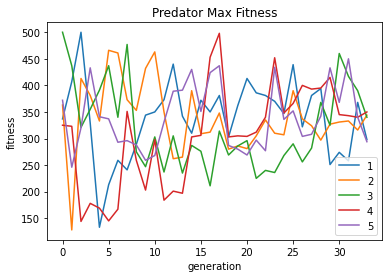

In [199]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
for num in range(1, 6):
    plt.plot(dbs['predator'][num]['MAX FITNESS'][1:], label = num)
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title("Predator Max Fitness")
plt.legend()
plt.plot()

[]

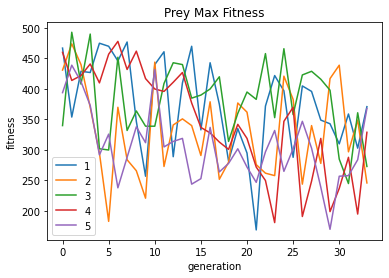

In [200]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
for num in range(1, 6):
    plt.plot(dbs['prey'][num]['MAX FITNESS'][1:], label = num)
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title("Prey Max Fitness")
plt.legend()
plt.plot()

[]

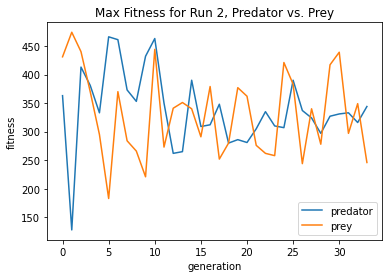

In [229]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'

plt.plot(dbs['predator'][num]['MAX FITNESS'][1:], label = 'predator')
plt.plot(dbs['prey'][num]['MAX FITNESS'][1:], label = 'prey')
#for num in range(1, 6):
#    plt.plot(dbs['predator'][num]['MAX FITNESS'][1:], label = num)
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title(f"Max Fitness for Run {num}, Predator vs. Prey")
plt.legend()
plt.plot()

[]

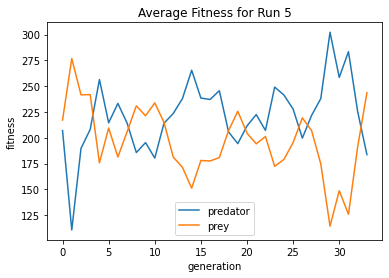

In [240]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'

plt.plot(dbs['predator'][num]['AVG FITNESS'][1:], label = 'predator')
plt.plot(dbs['prey'][num]['AVG FITNESS'][1:], label = 'prey')
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title(f"Average Fitness for Run {num}")
plt.legend()
plt.plot()

[]

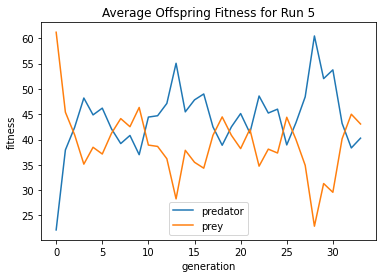

In [243]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'

plt.plot(dbs['predator'][num]['AVG OFFSPRING FITNESS'][1:], label = 'predator')
plt.plot(dbs['prey'][num]['AVG OFFSPRING FITNESS'][1:], label = 'prey')
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title(f"Average Offspring Fitness for Run {num}")
plt.legend()
plt.plot()

[]

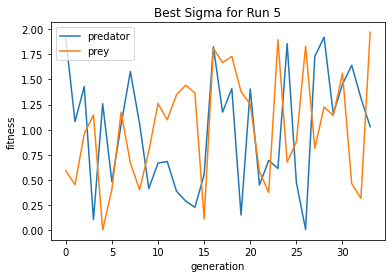

In [242]:
import matplotlib.pyplot as plt
#plt.set_xlabel = 'generation'
#plt.set_ylabel('fitness')# = 'fitness'
num = 5
plt.plot(dbs['predator'][num]['BEST INDIVIDUAL']['sigma'][1:], label = 'predator')
plt.plot(dbs['prey'][num]['BEST INDIVIDUAL']['sigma'][1:], label = 'prey')
plt.ylabel('fitness')
plt.xlabel('generation')
plt.title(f"Best Sigma for Run {num}")
plt.legend()
plt.plot()

In [224]:
#dbs['predator'][num]['BEST INDIVIDUAL']

In [105]:
tbs = getData(s)
#print(tbs)

In [74]:
print('1.452'.replace('.', '').isnumeric())

True


In [21]:
import math

#print(math.pi)

PI = math.pi
E = math.e

DIMENSION = 4

genome = [1.9, 1.9, 1.9, 1.9]
genome = []
genome = [2, 2, 4, 2]
#genome = [1.5, 1.5, 1.5, 1.5]
sum1 = 0
sum2 = 0

for i in range(4):
    sum1 += (genome[i] -2)* (genome[i] -2)
    sum2 += math.cos(2.0 * PI * (genome[i] -2))
    sum1 = -0.2 * math.sqrt(sum1 / DIMENSION)
    sum2 /= DIMENSION
ack =  -20.0 * math.exp(sum1) - math.exp(sum2) + 20.0 + E;

print(ack)


# for (int i = 0; i < DIMENSION; i++) { sum1 += (genome[i] -2)* (genome[i] -2); sum2 += Math.cos(2.0 * PI * (genome[i] -2)); }
# 		sum1 = -0.2 * Math.sqrt(sum1 / (double)DIMENSION); sum2 /= (double)DIMENSION;
		
# 		if (!printed){
# 			System.out.println("Using ackley function - be warned");
# 			printed = true;
# 			}
		
# 		return -20.0 * Math.exp(sum1) - Math.exp(sum2) + 20.0 + E;

ValueError: math domain error

In [5]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn import tree
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


excl_list = []

for file in excl_list:
    excl_list.append

In [6]:
old_state_file = 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
old_df_counties = pd.read_csv(old_state_file)
#print(old_df_counties)

In [1]:
folder = 'kaggle_archive'
state_file = 'us_states_covid19_daily.csv'
df_state = pd.read_csv(folder + '\\' + state_file)
#print(df_state)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# covid data from CDC 
#https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
covid_csv = 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'

df = pd.read_csv(covid_csv, parse_dates=['submission_date'])

In [2]:
#print(df)

In [3]:
print(type(df['submission_date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [30]:
test = pd.concat([df['submission_date'], df['tot_cases'].str.replace(',', '').astype(int)], axis=1)
print(type(test.iloc[1][1]))
# print(type(df['tot_cases'].iloc[0]))

<class 'numpy.int32'>


In [25]:
# df2 = df['tot_cases'].str.replace(',', '')
# print(df2)
df_num = pd.to_numeric(df['tot_cases'].str.replace(',', ''))#.astype(int)
print(df_num)

0         297229
1        2965966
2              0
3              0
4            183
          ...   
40495       5438
40496       4678
40497          4
40498     342495
40499       7649
Name: tot_cases, Length: 40500, dtype: int64


In [8]:
print(test)

0        2021-03-11 00:00:00
1        2021-06-11 00:00:00
2        2020-02-04 00:00:00
3        2021-05-09 00:00:00
4        2021-06-25 00:00:00
                ...         
40495                  5,438
40496                  4,678
40497                      4
40498                342,495
40499                  7,649
Length: 81000, dtype: object


In [13]:
col = 'tot_cases'
nan_rows = df[df[col].isnull()]
print(nan_rows)

Empty DataFrame
Columns: [submission_date, state, tot_cases, conf_cases, prob_cases, new_case, pnew_case, tot_death, conf_death, prob_death, new_death, pnew_death, created_at, consent_cases, consent_deaths]
Index: []


In [6]:
date_min = min(df['submission_date'])
date_max = max(df['submission_date'])
date_delta = date_max - date_min

#set interval to two weeks
date_interval = 2*7

date_split = date_delta//date_interval
print(date_split)
date_mod_min = date_max - date_split*date_interval

#train_test_split(date_split)

48 days 03:25:42.857142857


In [32]:
#single version

from sktime.forecasting.model_selection import temporal_train_test_split

breaks = 1
# dataframe with relevant data
df_time_case = pd.concat([df['submission_date'], df['tot_cases'].str.replace(',', '').astype(int)], axis=1)

cov_train_single, cov_test_single = temporal_train_test_split(df_time_case, test_size=len(df)//(8*breaks))

print(len(cov_test_single))
print(len(cov_train_single))


5062
35438


1265
35440


In [33]:
from sktime.forecasting.theta import ThetaForecaster
#prediction interval, possibly back-calculating? 

In [34]:
#from sktime.forecasting.arima import AutoARIMA
#from sktime.registry import all_estimators
from sktime.forecasting.exp_smoothing import ExponentialSmoothing


In [35]:
print()

In [36]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(cov_test_single.index, is_relative=False)

forecaster = ExponentialSmoothing()#trend="add", seasonal="additive", sp=12

forecaster.fit(cov_train_single[:int(cov_test_single.index[0])])
cov_pred_single = forecaster.predict(fh)
plot_series(cov_train_single, cov_test_single, cov_pred_single, \
            labels=["cov_train_single", "cov_test_single", "cov_pred_single"])
mean_absolute_percentage_error(cov_pred_single, cov_test_single)

ValueError: y must be univariate, but found 2 variables.

In [10]:
print(df)

      submission_date state  tot_cases conf_cases prob_cases new_case  \
0          2021-03-11    KS    297,229    241,035     56,194        0   
1          2021-06-11    TX  2,965,966        NaN        NaN    1,463   
2          2020-02-04    AR          0        NaN        NaN        0   
3          2021-05-09    PW          0        NaN        NaN        0   
4          2021-06-25    MP        183        183          0        0   
...               ...   ...        ...        ...        ...      ...   
40495      2020-06-07    SD      5,438        NaN        NaN       71   
40496      2020-04-10    TN      4,678      4,669          9      279   
40497      2021-09-25   RMI          4          4          0        0   
40498      2021-03-13    IA    342,495        NaN        NaN      425   
40499      2020-04-22    TN      7,649      7,624         25      288   

      pnew_case tot_death conf_death prob_death new_death pnew_death  \
0             0     4,851        NaN        NaN    

In [40]:
forecaster = AutoARIMA(sp=12, suppress_warnings=False)

NameError: name 'AutoARIMA' is not defined

In [ ]:
#the breaks are continuous breaks, so multiple may be helpful
#where the best split is is unknown. Possibly it should be continuous

from sktime.forecasting.model_selection import temporal_train_test_split

breaks = 4
cov_train, cov_test_1 = temporal_train_test_split(df['tot_cases'], test_size=len(df)//(8*breaks))
cov_train, cov_test_2 = temporal_train_test_split(cov_train, test_size=len(df)//(8*breaks))
cov_train, cov_test_3 = temporal_train_test_split(cov_train, test_size=len(df)//(8*breaks))
cov_train, cov_test_4 = temporal_train_test_split(cov_train, test_size=len(df)//(8*breaks))

print(len(cov_test_4))
print(len(cov_train))

#from sktime.forecasting.base import ForecastingHorizon # possibly a different version for final prediction